In [ ]:
# Connects google colab to your google drive.
# In your "My Drive", make a folder called "Bevameter" and then a folder called "Data" and place all the data.txt files in there.
from google.colab import drive
import os
import numpy as np
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Please place all data in a folder within Google Drive named "BevameterData".  Place only one regolith type of data at a time, the other trials can be placed in other folders with their respective regolith names.

In [ ]:
# Shows that it is connected to the right repository and can see all the .txt files.
file_list = os.listdir('/content/drive/My Drive/BevameterData')
directory = '/content/drive/My Drive/BevameterData/'
print(file_list)
print('There are', len(file_list), 'datasets')

['USMK (12 11) DATA0.TXT', 'USMK (12 11) DATA1.TXT', 'USMK (12 11) DATA2.TXT', 'USMK (12 11) DATA4.TXT', 'USMK (12 11) DATA5.TXT', 'USMK (12 11) DATA6.TXT', 'USMK (12 11) DATA7.TXT', 'USMK (12 11) DATA8.TXT', 'USMK (12 11) DATA10.TXT', 'USMK (12 11) DATA11.TXT', 'USMK (12 11) DATA12.TXT', 'USMK (12 11) DATA13.TXT', 'USMK (12 11) DATA14.TXT', 'USMK (12 11) DATA15.TXT', 'USMK (12 11) DATA16.TXT', 'USMK (12 11) DATA17.TXT', 'USMK (12 11) DATA18.TXT', 'USMK (12 11) DATA19.TXT', 'USMK (12 11) DATA20.TXT', 'USMK (12 11) DATA21.TXT', 'USMK (12 11) DATA22.TXT', 'USMK (12 11) DATA24.TXT', 'USMK (12 11) DATA25.TXT', 'USMK (12 11) DATA26.TXT', 'USMK (12 11) DATA27.TXT', 'USMK (12 11) DATA28.TXT', 'USMK (12 11) DATA29.TXT', 'USMK (12 11) DATA30.TXT', 'USMK (12 11) DATA31.TXT', 'USMK (12 11) DATA32.TXT']
There are 30 datasets


In [ ]:
# Traverse through all txt files and sort them by plate sizes.
index = 0
plates = [[3.0], [4.0], [4.5], [5.0], [5.5]]
plates2 = [[3.0], [4.0], [4.5], [5.0], [5.5]]
plate_sizes = plates


while index < len(file_list):
  file = file_list[index]
  if file.lower().endswith('.txt'):
    with open(str(directory + file),'r') as f:
      raw = f.readlines()[3].split(' ')
      plateDiam = raw[2]
      #print(plateDiam)
      plateNum = float(plateDiam[:4])
      x = 0
      while x < len(plate_sizes):
        if plateNum == plate_sizes[x][0]:
          plate_sizes[x].append(file)
        x += 1
      #print(plateNum)
  index += 1
#print(file_list)
print()
print(plate_sizes)
print(plates2)
print(directory, end='\n\n')



[[3.0], [4.0, 'USMK (12 11) DATA0.TXT', 'USMK (12 11) DATA1.TXT', 'USMK (12 11) DATA2.TXT', 'USMK (12 11) DATA4.TXT', 'USMK (12 11) DATA5.TXT', 'USMK (12 11) DATA6.TXT', 'USMK (12 11) DATA7.TXT', 'USMK (12 11) DATA8.TXT', 'USMK (12 11) DATA10.TXT', 'USMK (12 11) DATA11.TXT', 'USMK (12 11) DATA12.TXT', 'USMK (12 11) DATA13.TXT', 'USMK (12 11) DATA14.TXT', 'USMK (12 11) DATA15.TXT', 'USMK (12 11) DATA16.TXT'], [4.5, 'USMK (12 11) DATA17.TXT', 'USMK (12 11) DATA18.TXT', 'USMK (12 11) DATA19.TXT', 'USMK (12 11) DATA20.TXT', 'USMK (12 11) DATA21.TXT', 'USMK (12 11) DATA22.TXT', 'USMK (12 11) DATA24.TXT', 'USMK (12 11) DATA25.TXT', 'USMK (12 11) DATA26.TXT', 'USMK (12 11) DATA27.TXT', 'USMK (12 11) DATA28.TXT', 'USMK (12 11) DATA29.TXT', 'USMK (12 11) DATA30.TXT', 'USMK (12 11) DATA31.TXT', 'USMK (12 11) DATA32.TXT'], [5.0], [5.5]]
[[3.0], [4.0], [4.5], [5.0], [5.5]]
/content/drive/My Drive/Bevameter/Data/



GPS Coordinates were disabled for the testing in the current data set as they were all tested in house.

In [ ]:
#Extract and make an array of long,lat values from each file

def extract_coords(direct):

    list_files=[]
    all_coords=np.array([0,0])
    files=os.listdir(direct)
    index=0
    while index<len(files):
        file=files[index]
        if file.lower().endswith('.txt'):
            with open(os.path.join(direct, file), 'r') as f:
                raw=f.readlines()[1].split()
                newrow=[raw[2], raw[-1]]
                all_coords=np.vstack([all_coords, newrow])
                print(file)
                print(newrow)
                list_files.append(file[:-4])
        index+=1
    all_coords=np.delete(all_coords, 0, axis=0)
    return all_coords, directory, list_files

gps_coords, directory, list_files=extract_coords(directory)
print()
print(directory, end='\n\n')
print(gps_coords, end='\n\n')
print(list_files)

USMK (12 11) DATA0.TXT
['21.283892', '-157.847150']
USMK (12 11) DATA1.TXT
['21.283892', '-157.847150']
USMK (12 11) DATA2.TXT
['21.283892', '-157.847150']
USMK (12 11) DATA4.TXT
['21.283892', '-157.847150']
USMK (12 11) DATA5.TXT
['21.283892', '-157.847150']
USMK (12 11) DATA6.TXT
['21.283892', '-157.847150']
USMK (12 11) DATA7.TXT
['21.283892', '-157.847150']
USMK (12 11) DATA8.TXT
['21.283892', '-157.847150']
USMK (12 11) DATA10.TXT
['21.283892', '-157.847150']
USMK (12 11) DATA11.TXT
['21.283892', '-157.847150']
USMK (12 11) DATA12.TXT
['21.283892', '-157.847150']
USMK (12 11) DATA13.TXT
['21.283892', '-157.847150']
USMK (12 11) DATA14.TXT
['21.283892', '-157.847150']
USMK (12 11) DATA15.TXT
['21.283892', '-157.847150']
USMK (12 11) DATA16.TXT
['21.283892', '-157.847150']
USMK (12 11) DATA17.TXT
['21.283892', '-157.847150']
USMK (12 11) DATA18.TXT
['21.283892', '-157.847150']
USMK (12 11) DATA19.TXT
['21.283892', '-157.847150']
USMK (12 11) DATA20.TXT
['21.283892', '-157.847150']
U

In [ ]:
#Calculates geodesic distances from gps coordinates

from geographiclib.geodesic import Geodesic
import math

def calculate_geodesic_distance(lat1, lon1, lat2, lon2):
    # Create a Geodesic object
    geod = Geodesic.WGS84

    # Calculate the geodesic distance and azimuth between the coordinates
    results = geod.Inverse(lat1, lon1, lat2, lon2)

    # Extract the distance and azimuth values
    distance = results['s12']
    azimuth = results['azi1']

    # Calculate the x and y components
    x = distance * math.sin(math.radians(azimuth))
    y = distance * math.cos(math.radians(azimuth))

    #print('func ', lat1, lon1, lat2, lon2)

    return x, y

In [ ]:
#Creates xy coordinates based on gps coordinates using the geodesic distances

def xy_points(gps_coords):
    xy_coords=np.array([0,0])
    lat1 = float(gps_coords[0][0])
    lon1 = float(gps_coords[0][1])



    for i in range(1,len(gps_coords)):
        lat2=float(gps_coords[i][0])
        lon2=float(gps_coords[i][1])

        #print(lat1, lon1, lat2, lon2)

        # Calculate geodesic distance and components
        x, y = calculate_geodesic_distance(lat1, lon1, lat2, lon2)
        newrow=[x, y]
        xy_coords=np.vstack([xy_coords, newrow])
    #     print("X Component (m):", x)
    #     print("Y Component (m):", y)
    return xy_coords

print(xy_points(gps_coords))
xy_coords=xy_points(gps_coords)

[[ 0.  0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0. -0.]]


In [ ]:
#Longitude and Lattitude offset

latitude_offset=21.298355
longitude_offset=-157.81666

In [ ]:
#Create xy coordinates based on a longitude and lattitude offset as requested

def xy_points_offset(gps_coords, latitude_offset, longitude_offset):
    xy_coords=np.array([0,0])
    lat1 = latitude_offset
    lon1 = longitude_offset

    for i in range(len(gps_coords)):
        lat2=float(gps_coords[i][0])
        lon2=float(gps_coords[i][1])

        #print(lat1, lon1, lat2, lon2)

        # Calculate geodesic distance and components
        y, x = calculate_geodesic_distance(lat1, lon1, lat2, lon2)
        newrow=[x, y]
        xy_coords=np.vstack([xy_coords, newrow])
    #     print("X Component (m):", x)
    #     print("Y Component (m):", y)
    xy_coords=np.delete(xy_coords, 0, axis=0)
    return xy_coords

xy_coords_offset=xy_points_offset(gps_coords, latitude_offset, longitude_offset)
print(xy_coords_offset)

[[-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]
 [-1601.04967146 -3164.02458023]]


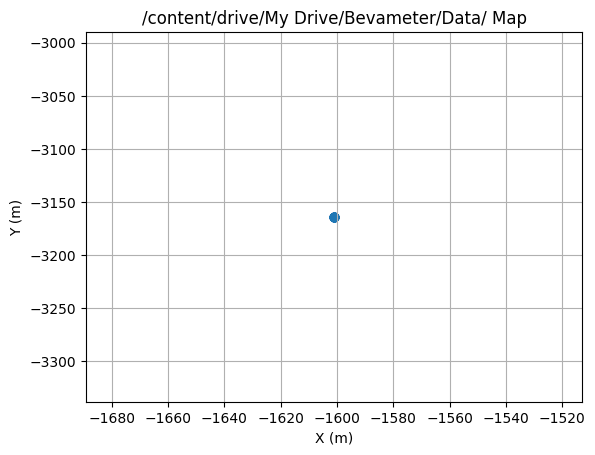

In [ ]:
#Creates general map of coordinates

import matplotlib.pyplot as plt

def create_map(coordinates):
    x = [coord[0] for coord in coordinates]
    y = [coord[1] for coord in coordinates]

    plt.scatter(x, y)
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.title(directory + ' Map')
    plt.grid(True)
    plt.show()

create_map(xy_coords_offset)

In [ ]:
# Function using linear regression to calculate n, k values from text files.

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

def nk_calculation(sinkage, pressure):
    X=sinkage
    y=pressure

    X=np.array(X).reshape(-1,1)

    reg=LinearRegression().fit(X, y)

    y_pred=reg.predict(X)

    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    #plt.xlim(-2.4, -1.0)
    #plt.ylim(1.2, 2.8)
    plt.title("Linear Regression Chart")
    plt.xlabel('log sinkage (m)')
    plt.ylabel('log pressure (kPa)')
    # Comment the next line in/out if you want to see the individual graphs or collectively together
    plt.show()
    print('slope: ', reg.coef_)
    print('intercept: ', reg.intercept_)
    n=reg.coef_
    k=reg.intercept_

    return n[0], k

In [ ]:
# Function using polynomial best-fit curve to calculate n, k values from text files.

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from scipy import stats
from scipy.stats import t as tee

def reece_calc(sinkage, pressure):
    y=pressure
    X=sinkage

    X1 = np.array(X).reshape(1,-1)
    X1 = X1[0]
    X=np.array(X).reshape(-1,1)

    res = stats.linregress(X1,y)

    #plt.figure()
    plt.scatter(X, y)
    plt.plot(X1, res.intercept + res.slope*X1, 'r', label='fitted line')
    #plt.xlim(-2.4, -1.0)
    #plt.ylim(1.2, 2.8)
    plt.title("Reece Model, Linear Regression Graph")
    plt.ylabel('log pressure (kPa)')
    plt.xlabel('log sinkage (m)')
    # Comment the next line in/out if you want to see the individual graphs or collectively together
    #plt.show()

    tinv = lambda p, df: abs(tee.ppf(p/2, df))
    ts = tinv(0.05, len(X1)-2)

    n = res.slope
    nerr = ts*res.stderr
    k=res.intercept
    kerr = ts*res.intercept_stderr
    print(f"slope n: {n:.4f} +/- {nerr:.4f}")
    print(f"y-intercept k: {k:.4f} +/- {kerr:.4f}")

    return n, k, nerr, kerr

In [ ]:
#Defining TestData folder as directory
directory=directory

In [ ]:
# Seprate all the n and k values for each plate size
# DO NOT RE-RUN THIS SCRIPT, ONLY ONCE OR RESTART ALL CODE

#Create a sublist of file positions for the n and k values for each plate size
def sublistCreator(data):
  dataToPlate = []
  x = 0
  while x < len(plate_sizes):
    dataToPlate.append([])
    x += 1
  return dataToPlate

#Take out the starts of each sublist (they are just name fillers)
dataToPlate = sublistCreator(plate_sizes)

print(plate_sizes)
plate_sizes2 = plate_sizes
x = 0
while x < len(plate_sizes2):
  plate_sizes2[x] = plate_sizes2[x][1:]
  x += 1
print(plate_sizes2)

x = 0
while x < len(plate_sizes2):
  y = 0
  while y < len(plate_sizes2[x]):
    index = 0
    while index < len(file_list):
      if(file_list[index] == plate_sizes2[x][y]):
        dataToPlate[x].append(index)
      index += 1
    y += 1
  x += 1

print(dataToPlate)


[[3.0], [4.0, 'USMK (12 11) DATA0.TXT', 'USMK (12 11) DATA1.TXT', 'USMK (12 11) DATA2.TXT', 'USMK (12 11) DATA4.TXT', 'USMK (12 11) DATA5.TXT', 'USMK (12 11) DATA6.TXT', 'USMK (12 11) DATA7.TXT', 'USMK (12 11) DATA8.TXT', 'USMK (12 11) DATA10.TXT', 'USMK (12 11) DATA11.TXT', 'USMK (12 11) DATA12.TXT', 'USMK (12 11) DATA13.TXT', 'USMK (12 11) DATA14.TXT', 'USMK (12 11) DATA15.TXT', 'USMK (12 11) DATA16.TXT'], [4.5, 'USMK (12 11) DATA17.TXT', 'USMK (12 11) DATA18.TXT', 'USMK (12 11) DATA19.TXT', 'USMK (12 11) DATA20.TXT', 'USMK (12 11) DATA21.TXT', 'USMK (12 11) DATA22.TXT', 'USMK (12 11) DATA24.TXT', 'USMK (12 11) DATA25.TXT', 'USMK (12 11) DATA26.TXT', 'USMK (12 11) DATA27.TXT', 'USMK (12 11) DATA28.TXT', 'USMK (12 11) DATA29.TXT', 'USMK (12 11) DATA30.TXT', 'USMK (12 11) DATA31.TXT', 'USMK (12 11) DATA32.TXT'], [5.0], [5.5]]
[[], ['USMK (12 11) DATA0.TXT', 'USMK (12 11) DATA1.TXT', 'USMK (12 11) DATA2.TXT', 'USMK (12 11) DATA4.TXT', 'USMK (12 11) DATA5.TXT', 'USMK (12 11) DATA6.TXT', 

**WARNING:** Change Plateorder values to 0 and 5 to properly calculate all kc and kphi values.

---
['USMK (12 11) DATA0.TXT', 'USMK (12 11) DATA1.TXT', 'USMK (12 11) DATA2.TXT', 'USMK (12 11) DATA4.TXT', 'USMK (12 11) DATA5.TXT', 'USMK (12 11) DATA6.TXT', 'USMK (12 11) DATA7.TXT', 'USMK (12 11) DATA8.TXT', 'USMK (12 11) DATA10.TXT', 'USMK (12 11) DATA11.TXT', 'USMK (12 11) DATA12.TXT', 'USMK (12 11) DATA13.TXT', 'USMK (12 11) DATA14.TXT', 'USMK (12 11) DATA15.TXT', 'USMK (12 11) DATA16.TXT', 'USMK (12 11) DATA17.TXT', 'USMK (12 11) DATA18.TXT', 'USMK (12 11) DATA19.TXT', 'USMK (12 11) DATA20.TXT', 'USMK (12 11) DATA21.TXT', 'USMK (12 11) DATA22.TXT', 'USMK (12 11) DATA24.TXT', 'USMK (12 11) DATA25.TXT', 'USMK (12 11) DATA26.TXT', 'USMK (12 11) DATA27.TXT', 'USMK (12 11) DATA28.TXT', 'USMK (12 11) DATA29.TXT', 'USMK (12 11) DATA30.TXT', 'USMK (12 11) DATA31.TXT', 'USMK (12 11) DATA32.TXT']
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA0.TXT 4.00cm

[-1.831797253157369, -1.8247781996569474, -1.8178707859470016, -1.8057632512761705, -1.7996968170184147, -1.7934439559

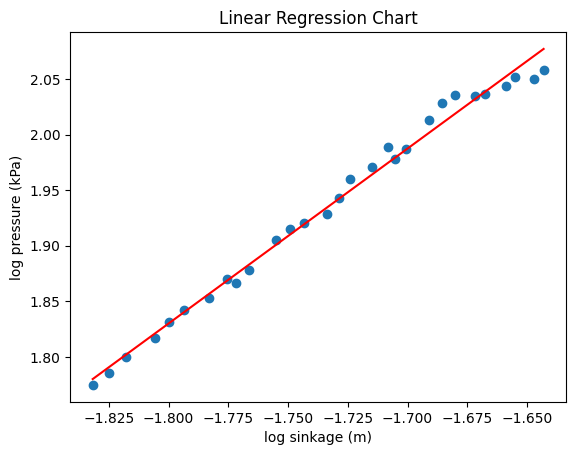

slope:  [1.57311134]
intercept:  4.661686894624804
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA1.TXT 4.00cm

[-2.101274818410506, -2.087246696328677, -2.073657553374345, -2.050609993355087, -2.024568191490737, -2.0123337350737254, -2.001740661576301, -1.991399828238082, -1.980883709552927, -1.9621752494116578, -1.9531148091622896, -1.9438577379409476, -1.9347938719456876, -1.9186526921958673, -1.8989406450918842, -1.8907590314117968, -1.883060353449244, -1.8748441704194694, -1.8671002300555168, -1.852323675758901, -1.8449677712090298, -1.8374355934769808, -1.8239087409443187, -1.8175853475654458, -1.800519085137644, -1.7956086680807002, -1.7894139750948435, -1.7833064008302455, -1.771856392402258, -1.7659891824128204, -1.7599502278873522, -1.7539940959239706, -1.743763466794077, -1.7384992268017196]
[1.7783817064685965, 1.8034484167974874, 1.8190406973837028, 1.837775358208764, 1.8625263720477716, 1.8683711005647723, 1.8756601950375444, 1.8985714762324108, 1.9127921911

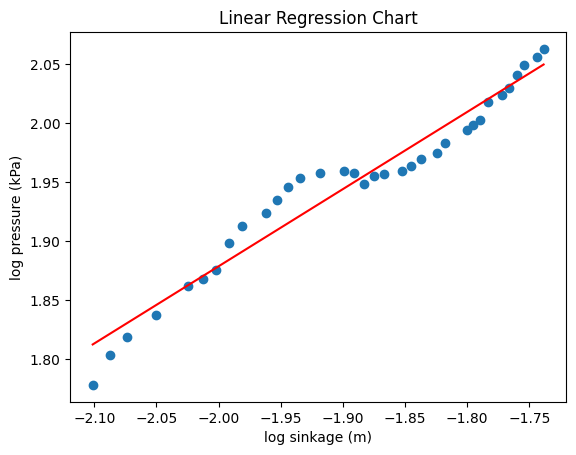

slope:  [0.65384065]
intercept:  3.186572333517876
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA2.TXT 4.00cm

s[i] is significantly larger.  -1.3973974795797435 - -1.7133190306450696 = 0.31592155106532616
[-1.8709549401120418, -1.8635965518660096, -1.8557372262380092, -1.8489367466462496, -1.8410347396165896, -1.8341623753098715, -1.821886747685368, -1.8130436645345875, -1.8010681300677907, -1.794524963259109, -1.787812395596042, -1.7812020018882624, -1.7752080435073185, -1.7698066211309542, -1.7594507517174, -1.7539940959239706, -1.7461775612919266, -1.7358908436941913, -1.7302536268692328, -1.7249191015431413, -1.718739312944987, -1.7133190306450696, -1.6985359268567, -1.6937894918322385, -1.6831912479469777, -1.678608721688311]
[1.7816524870031074, 1.7876138748855348, 1.7924920644383424, 1.800119218792222, 1.8229048315279248, 1.8463804550891263, 1.8664942848439612, 1.8715431903671467, 1.883191106195225, 1.9009669289790152, 1.9116070968053478, 1.9221169290309446, 1.92

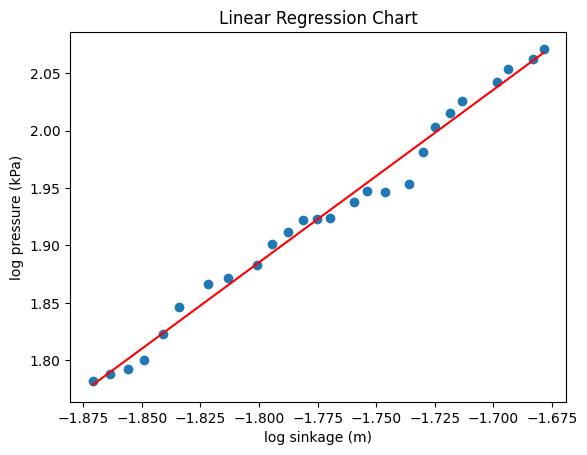

slope:  [1.50380201]
intercept:  4.592071172079773
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA4.TXT 4.00cm

[-2.0570004066339593, -2.0438315695246363, -2.0315170514460643, -2.0190880622231564, -2.007446482167864, -1.9821322810364943, -1.9746941347352296, -1.9645702618154515, -1.9546770212133424, -1.935916564036404, -1.925915310971756, -1.915781313260761, -1.905528871358355, -1.8958544494459917, -1.8870600239159199, -1.8667805432675053, -1.8635965518660096, -1.8566728700079536, -1.8416375079047502, -1.8338660296948908, -1.8262311768633497, -1.8187282284405382, -1.8107905104176936, -1.8032712773767128, -1.7958800173440752, -1.7780644001719945, -1.7675121336470134, -1.7609509068598082, -1.7542406440327227, -1.7473896594326268, -1.7408841558149335, -1.7347103741391698, -1.7281583934635008]
[1.782337944699374, 1.8066983283106746, 1.8263224520984722, 1.8442574857366842, 1.8630954411161824, 1.891038259369117, 1.9000103328171427, 1.912707648712965, 1.926602929450496, 1.940860

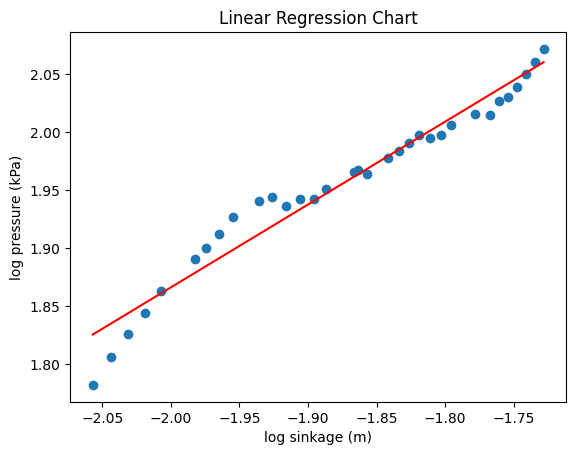

slope:  [0.71367675]
intercept:  3.2937131274654403
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA5.TXT 4.00cm

[-1.7037737127388393, -1.694004117229195, -1.6893066876566394, -1.684029654543082, -1.6759234202605136, -1.6697892154284717, -1.6665527255032495, -1.6623411089738576, -1.6530605373010094, -1.648396927580871, -1.6435916729610187, -1.6363880201078556, -1.6322714539130232, -1.6247022617826608, -1.6212388246836267, -1.613322716039162, -1.6062493596519194, -1.6024075659618833, -1.598427154323554, -1.5905741313285564, -1.5872035712834565, -1.583692412940117, -1.5772460586986516, -1.5738141747554886, -1.5673513399868932, -1.5611413405794379, -1.5575202309355514]
[1.78710609303657, 1.7984724986118856, 1.8022506626721315, 1.814029044346783, 1.8364672413104324, 1.860671730872318, 1.8508880646356973, 1.8667293308430435, 1.8955034834823348, 1.9074336131064653, 1.9162443368455309, 1.9265210334514034, 1.9403451493369084, 1.9545113629852375, 1.9621234145168014, 1.945393307672

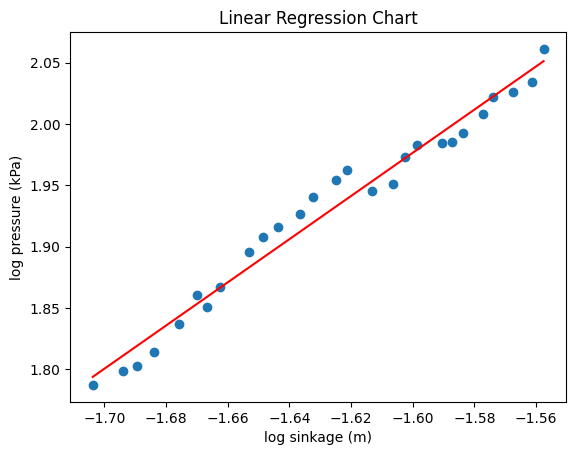

slope:  [1.76105101]
intercept:  4.794069223999593
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA6.TXT 4.00cm

s[i] is significantly larger.  -1.6593576224392945 - -1.9633711046378388 = 0.3040134821985443
s[i] is significantly larger.  -1.379343520180379 - -1.6817279197883728 = 0.3023843996079938
[-2.0061230850587886, -1.9804683154687444, -1.9730583720409705, -1.9633711046378388, -1.935916564036404, -1.9273825234547632, -1.9182927299026507, -1.9100948885606022, -1.8951715963463445, -1.889410289700751, -1.8667805432675053, -1.8607507824283929, -1.8477116556169433, -1.8413360191860106, -1.834458923277627, -1.82333006733185, -1.817015032996418, -1.8052082422780753, -1.799696817018415, -1.7937139555875674, -1.7833064008302455, -1.7793689805519075, -1.773915884024176, -1.7627076624325408, -1.7569619513137051, -1.7508016426088868, -1.7449688366544485, -1.7342390832823893, -1.7290883605895186, -1.7235381958267555, -1.7178312216953582, -1.7086311495484172, -1.7057542838618815, -

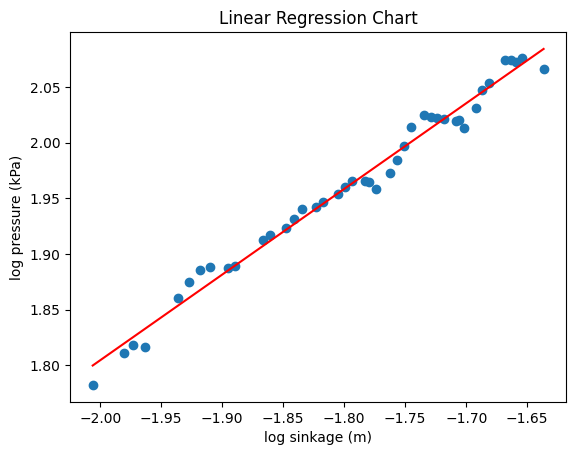

slope:  [0.76959622]
intercept:  3.3436758722672284
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA7.TXT 4.00cm

s[i] is significantly larger.  -1.7918274733328783 - -2.1573907603894376 = 0.36556328705655927
s[i] is significantly larger.  -1.8110715162391462 - -1.9374180157718368 = 0.12634649953269061
s[i] is significantly larger.  -1.8052082422780753 - -1.9374180157718368 = 0.1322097734937615
s[i] is significantly larger.  -1.7991495019089223 - -1.9374180157718368 = 0.1382685138629145
s[i] is significantly larger.  -1.7875460389597242 - -1.9374180157718368 = 0.14987197681211262
[-2.1870866433571443, -2.1726307269461747, -2.1573907603894376, -2.1174754620451193, -2.104577453960592, -2.0909791457888436, -2.0783135245163975, -2.0555173278498313, -2.022276394711152, -2.012780770091995, -2.0026136156026864, -1.9931062920520994, -1.9746941347352296, -1.9653715433746797, -1.955852379121277, -1.946153573147747, -1.9374180157718368]
[1.7801062400988954, 1.786880221502729, 1.80922

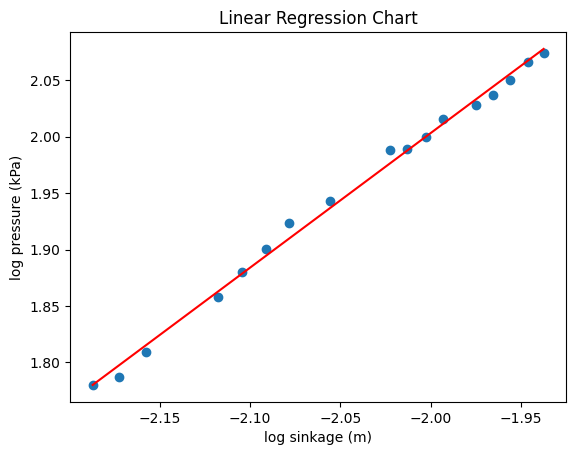

slope:  [1.19290561]
intercept:  4.388974484396888
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA8.TXT 4.00cm

[-1.7242280998350685, -1.7185121120599185, -1.7092977567121455, -1.7042130597483907, -1.6991872058818829, -1.6901569952839295, -1.6878226435602213, -1.6792307716613133, -1.6740740442285336, -1.6687752189792675, -1.6635402661514702, -1.6587633767613075, -1.6493643917410454, -1.6449317936511492, -1.6399749108106023, -1.6350739662100242, -1.6270879970298933, -1.6223295606656767, -1.618704376996174, -1.6140364293993024, -1.609594843519919, -1.6017126946425988, -1.5980827494824252, -1.5943122133272223, -1.588211995456131]
[1.7867672416680898, 1.8078838953208929, 1.821446767149581, 1.8289450423400018, 1.8481008248184447, 1.865411431761554, 1.8724253839838176, 1.8709385500269384, 1.885312592578726, 1.8959430973288645, 1.9110133347258822, 1.9285230530476334, 1.9399879829315145, 1.9487134687331267, 1.9635923448269859, 1.9748386449999313, 1.978450945070146, 1.968601908900

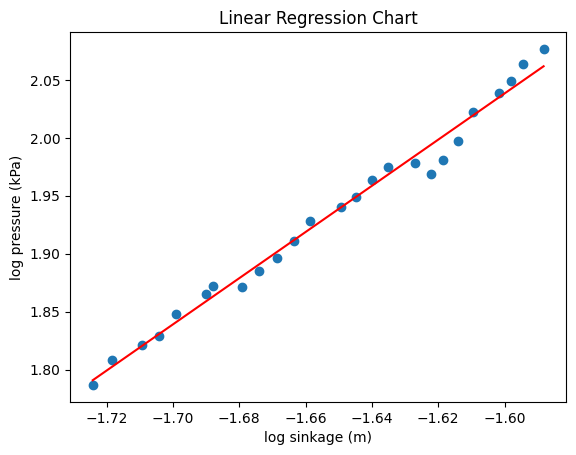

slope:  [1.9923533]
intercept:  5.226067930920901
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA10.TXT 4.00cm

s[i] is significantly larger.  -1.552221990705379 - -1.9017024635053021 = 0.3494804727999232
[-2.106793246940152, -2.0969100130080562, -2.08460016478773, -2.072116589669293, -2.0501222959631247, -2.0385789059335515, -2.0268721464003012, -2.0154726866562074, -2.00436480540245, -1.9846402445907858, -1.961379838050297, -1.9542859410591322, -1.9453869454431119, -1.9366666410482503, -1.9193735130781941, -1.9108016331948512, -1.9017024635053021, -1.8777841217271733, -1.8699880503280957, -1.854803593885818, -1.8483237691529522, -1.835944708106548]
[1.791263665753357, 1.8041546310083612, 1.8077762501395505, 1.8177800448819585, 1.8310419755497955, 1.8517645421923263, 1.8642786121250576, 1.8751073643929534, 1.8827383859604387, 1.8952835095719929, 1.9146058841361122, 1.9209985201901076, 1.9369601401354966, 1.9484410007543647, 1.9629149943149926, 1.9758999086394904, 1.98719

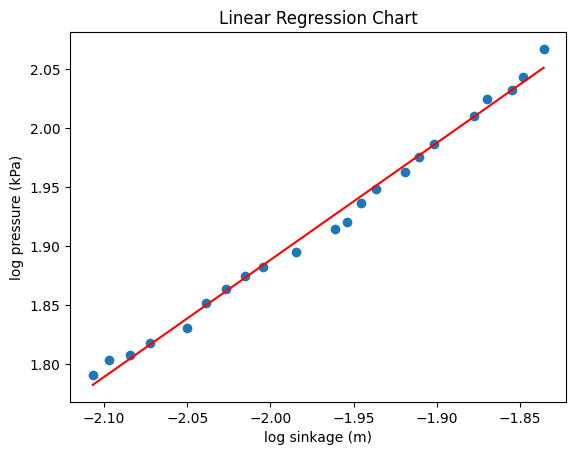

slope:  [0.99273526]
intercept:  3.8740960598098497
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA11.TXT 4.00cm

s[i] is significantly larger.  -1.4368750396619554 - -1.722849386036203 = 0.2859743463742477
[-1.9625735020593762, -1.9527251326158204, -1.9427143555817852, -1.9329291439546297, -1.9164973801697325, -1.9083330424043152, -1.8870600239159199, -1.8804142250382159, -1.8728952016351923, -1.864867348623225, -1.8513973451939065, -1.8443603662402233, -1.8312079796858178, -1.8256494025206198, -1.8190144192132691, -1.8018930011265986, -1.7958800173440752, -1.7891466346851068, -1.7825160557860937, -1.7710865940053115, -1.7654827164873133, -1.755475488429916, -1.7508016426088868, -1.7456936676687143, -1.7325935812470958, -1.72792621249999, -1.722849386036203, -1.7079655640052633, -1.7031155244614529, -1.6937894918322383, -1.6897316333675523, -1.6852903070448262, -1.6779875614175994, -1.673459331483438, -1.6689778289581712, -1.664141088680182, -1.6593576224392945, -1.65111

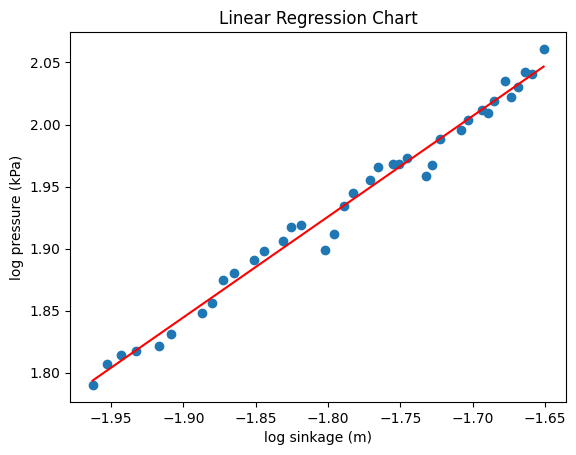

slope:  [0.81258292]
intercept:  3.38835541012193
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA12.TXT 4.00cm

s[i] is significantly larger.  -1.4140882896805655 - -1.7637147225519714 = 0.3496264328714058
s[i] is significantly larger.  -1.3667335888445753 - -1.7110803943382733 = 0.344346805493698
s[i] is significantly larger.  -1.3526170298853801 - -1.694648630553376 = 0.34203160066799576
[-1.9118639112994489, -1.9030899869919435, -1.894489815230026, -1.87942606879415, -1.8719239873312845, -1.8526328922062136, -1.84740592207253, -1.8410347396165896, -1.835052627378158, -1.8230410194130917, -1.8161609629435786, -1.809388202186395, -1.8029952719769542, -1.791021482723746, -1.784362436564938, -1.77780395369828, -1.7675121336470134, -1.7637147225519714, -1.7478754474943554, -1.7423214251308157, -1.7363639314118917, -1.730954290342377, -1.72584215073632, -1.7162466166674732, -1.7110803943382733, -1.6974526275125144, -1.694648630553376]
[1.7750280644610088, 1.7783817064685965,

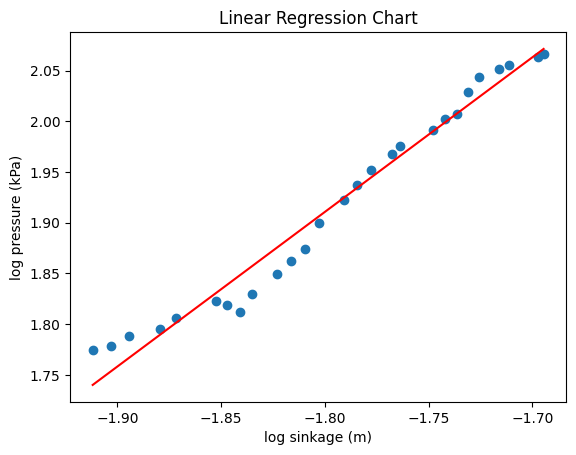

slope:  [1.52512441]
intercept:  4.655959187313584
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA13.TXT 4.00cm

s[i] is significantly larger.  -1.4730149314400043 - -1.7574585717016158 = 0.2844436402616115
[-1.7915586435614324, -1.7856861025756001, -1.7793689805519075, -1.7680209731684955, -1.7637147225519714, -1.7574585717016158, -1.739928612014925, -1.734474664780926, -1.7286231281059252, -1.7198771036976923, -1.7148929704331877, -1.7059749059046772, -1.7011469235902932, -1.697236291527018, -1.6920762963881182, -1.687611050629408, -1.6786087216883108, -1.6738690432892052, -1.6687752189792675, -1.6609462642908606, -1.6565914061961424, -1.648977147415876, -1.6447400944726214, -1.641684359917804, -1.6377060620357689, -1.6337638762817066, -1.626352527790782, -1.6225116166238671, -1.6161846340195687, -1.613322716039162, -1.6099485035410126, -1.6039751033914065, -1.597051170655595, -1.5941416006823634, -1.5909126305521646, -1.5875394525700386, -1.5810361692963772, -1.5779028

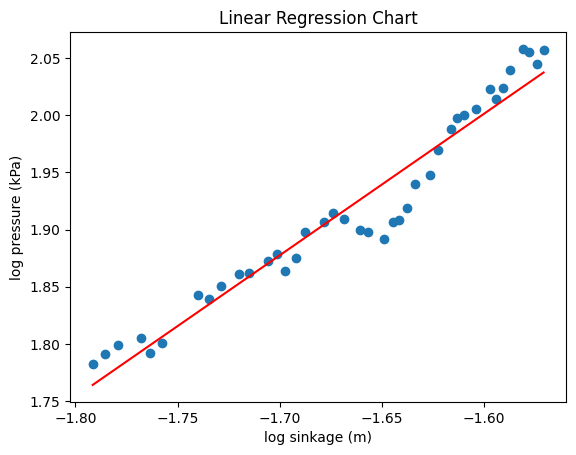

slope:  [1.2393878]
intercept:  3.984484864099551
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA14.TXT 4.00cm

s[i] is significantly larger.  -1.4746959900417609 - -1.7478754474943554 = 0.27317945745259453
s[i] is significantly larger.  -1.4320330931768457 - -1.7066374452885544 = 0.27460435211170875
s[i] is significantly larger.  -1.2875186621980812 - -1.570247719997592 = 0.28272905779951074
[-1.8661418747966652, -1.8517059025652542, -1.8443603662402237, -1.8365404482300098, -1.8288588489716175, -1.8153085691824011, -1.8082696066371435, -1.7896814801737682, -1.7478754474943554, -1.7307206102281012, -1.725149679983335, -1.7194216296319236, -1.7099653886374817, -1.7066374452885544, -1.6933605589757381, -1.6884580415988049, -1.6834006979061389, -1.678194516142461, -1.6689778289581712, -1.6643415477106984, -1.6593576224392945, -1.6546262694409115, -1.6466609046886953, -1.6437828657802644, -1.639595945270061, -1.6313412876077729, -1.626720106722504, -1.6223295606656767, -1.61

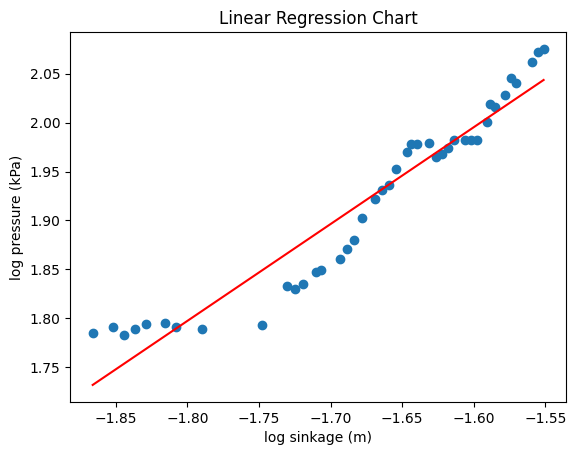

slope:  [0.99040138]
intercept:  3.5800769369717047
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA15.TXT 4.00cm

s[i] is significantly larger.  -1.401647290130716 - -1.678401569534656 = 0.27675427940393993
[-1.7363639314118917, -1.725611204449621, -1.7201050199883616, -1.714892970433188, -1.706416486503883, -1.7015836199387053, -1.69637202361611, -1.6869768896767618, -1.6831912479469777, -1.678401569534656, -1.664141088680182, -1.6593576224392945, -1.6507224725320446, -1.6468534537860204, -1.6424462802569182, -1.638272163982407, -1.630042392653947, -1.6269040129212728, -1.6225116166238671, -1.6145724851948693, -1.610656688747922, -1.606600304706898, -1.599634726650061, -1.5961933894525773, -1.5926090955292682, -1.5893914574316321, -1.58236226034777, -1.580044251510242, -1.5765902722669063, -1.5696024086130331, -1.5657505476035243, -1.561932549546506]
[1.7980873638082429, 1.809548992770782, 1.822592800992239, 1.8364168503511715, 1.8389292632466028, 1.8434153014549293, 1.8

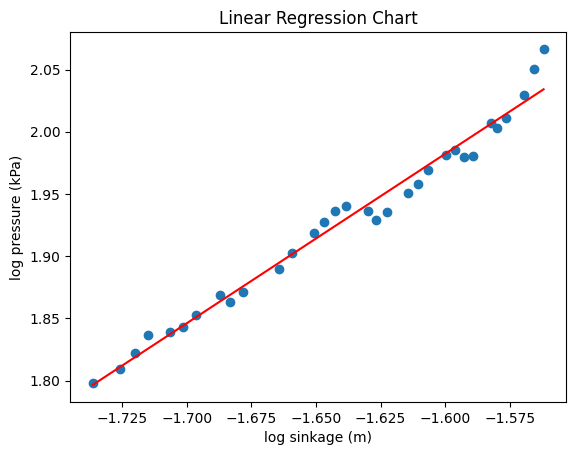

slope:  [1.36197492]
intercept:  4.161433533468665
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA16.TXT 4.00cm

s[i] is significantly larger.  -1.7370745306681683 - -1.989700043360188 = 0.2526255126920196
s[i] is significantly larger.  -1.7318902701915218 - -1.989700043360188 = 0.25780977316866616
s[i] is significantly larger.  -1.7265357273786535 - -1.989700043360188 = 0.26316431598153445
s[i] is significantly larger.  -1.71602071576152 - -1.989700043360188 = 0.273679327598668
s[i] is significantly larger.  -1.7121982700697738 - -1.989700043360188 = 0.27750177329041414
s[i] is significantly larger.  -1.7070797003999936 - -1.989700043360188 = 0.28262034296019434
s[i] is significantly larger.  -1.6974526275125144 - -1.989700043360188 = 0.29224741584767355
s[i] is significantly larger.  -1.6918626213619612 - -1.989700043360188 = 0.2978374219982267
s[i] is significantly larger.  -1.6873995607387404 - -1.989700043360188 = 0.3023004826214475
s[i] is significantly larger.  -1.

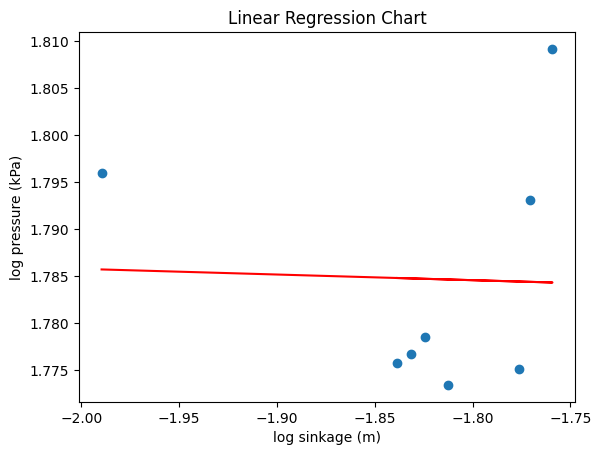

slope:  [-0.00602958]
intercept:  1.7736977381157504
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA17.TXT 4.50cm

[-1.7351821769904634, -1.7169250252645283, -1.7117507744280136, -1.7059749059046772, -1.7004927012995124, -1.6903698325741012, -1.685711339052502, -1.6804775509345458, -1.6757175447023074, -1.6671577330056482, -1.6561976668383447, -1.6530605373010094, -1.6487836546606578, -1.6443569497791308, -1.6360121702515085, -1.6320852612062473, -1.627640417475676, -1.62324060459512, -1.6190655366692979, -1.6111885865264763, -1.6011922697967353, -1.5985994592184558, -1.5948244537820104, -1.5912513938157558, -1.584025588623434, -1.5802094138936371, -1.5764264802672643, -1.5730010412434625, -1.5660702343915358, -1.5625665562020286]
[1.7812931064057222, 1.7932424200025578, 1.8019072622257521, 1.8191080366879382, 1.8318072523679076, 1.832490832546291, 1.8472636406025418, 1.8716533474969457, 1.8875498784310645, 1.8832100989502873, 1.890442598695721, 1.8787181628119878, 1.8624

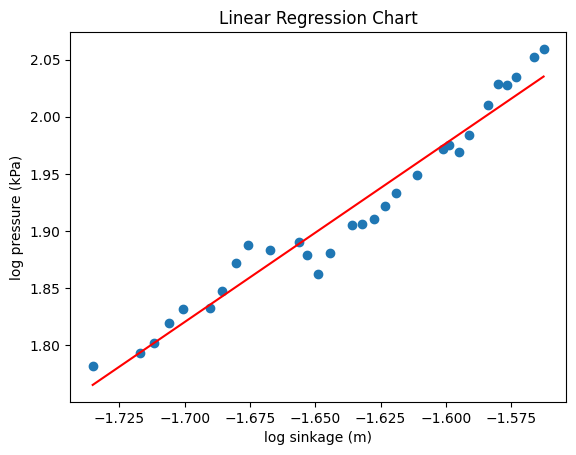

slope:  [1.56510634]
intercept:  4.480818402613128
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA18.TXT 4.50cm

s[i] is significantly larger.  -1.497846107128639 - -1.8127613801685212 = 0.3149152730398821
[-1.8434508486682186, -1.8368386250229816, -1.8239087409443187, -1.8190144192132691, -1.8127613801685212, -1.7942544590573377, -1.7883455994468176, -1.7780644001719945, -1.7731424297112763, -1.7677664788852663, -1.7627076624325413, -1.7527634504932357, -1.7488486568246455, -1.743763466794077, -1.7332980331159118, -1.7283906986211677, -1.7235381958267555, -1.7146677723561154, -1.7104110474574032, -1.7057542838618818, -1.7015836199387055, -1.6927179529666538, -1.6897316333675523, -1.6855007720268484, -1.6773672883077766, -1.6728454875905685, -1.6681679555637512]
[1.779208633897455, 1.792758379291735, 1.814902669216499, 1.7962664313376484, 1.8015190949287334, 1.8485433163266434, 1.853854205593454, 1.857472871074479, 1.8746170771868373, 1.8895627116855938, 1.898109688049602

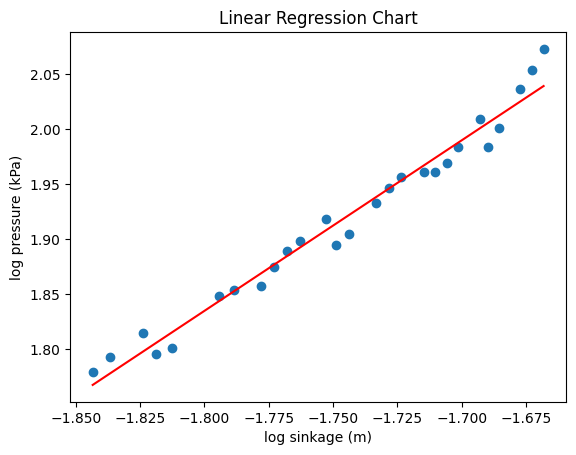

slope:  [1.5471825]
intercept:  4.619969230544597
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA19.TXT 4.50cm

s[i] is significantly larger.  -1.4433357378774314 - -1.7219326691113372 = 0.27859693123390583
[-1.8338660296948908, -1.817015032996418, -1.8110715162391462, -1.804377056413063, -1.7980569365983496, -1.7848914189469065, -1.778585762157661, -1.771856392402258, -1.761201437286083, -1.755970410969978, -1.7510463845042925, -1.737786294523583, -1.7337683033101066, -1.72584215073632, -1.7219326691113372, -1.7077439286435239, -1.7028963498507432, -1.6978856230437986, -1.6927179529666538, -1.6880343396316335, -1.6779875614175994, -1.6748950170285923, -1.670398751643481, -1.665948559653108, -1.6575773191777936, -1.6532559453951512, -1.6487836546606578, -1.6418747147233514, -1.6382721639824072]
[1.7763374809500596, 1.7754678389715204, 1.7748259340038757, 1.787308859049724, 1.8064957531500387, 1.8153208632612372, 1.81326785383167, 1.810318044923484, 1.8152372566613248, 1.8

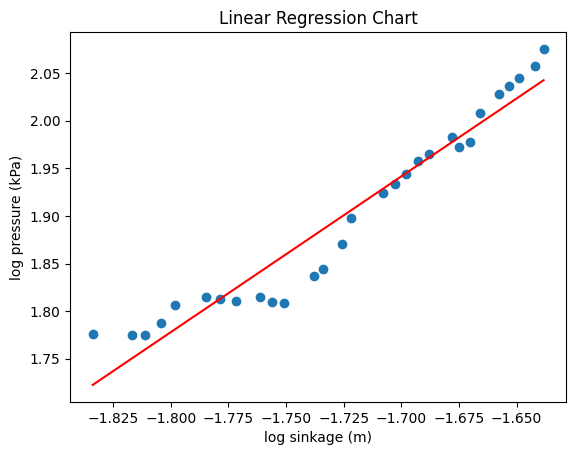

slope:  [1.63648175]
intercept:  4.72361374796741
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA20.TXT 4.50cm

s[i] is significantly larger.  -1.4291069637816076 - -1.7634627385113055 = 0.3343557747296979
[-1.8057632512761705, -1.8010681300677907, -1.795066477645855, -1.788612447063141, -1.7767637268970022, -1.770062314092066, -1.7634627385113055, -1.7459355470856621, -1.7401673009365162, -1.734474664780926, -1.7246886454581882, -1.721246399047171, -1.7164726351383062, -1.7075224063322159, -1.70245833218184, -1.6970200632517507, -1.692290076595193, -1.6831912479469777, -1.6788159726976857, -1.6740740442285336, -1.6693833327055616, -1.6615435063953952, -1.658961368322477, -1.655018586072742, -1.6468534537860204, -1.6430185990068686]
[1.786416258834366, 1.794428237699525, 1.7881106337055759, 1.7993996315704144, 1.797139034568529, 1.795916898536565, 1.8081137148559268, 1.8184445483787652, 1.8405320783416037, 1.8448101029500985, 1.852359873994807, 1.858609371588465, 1.854312

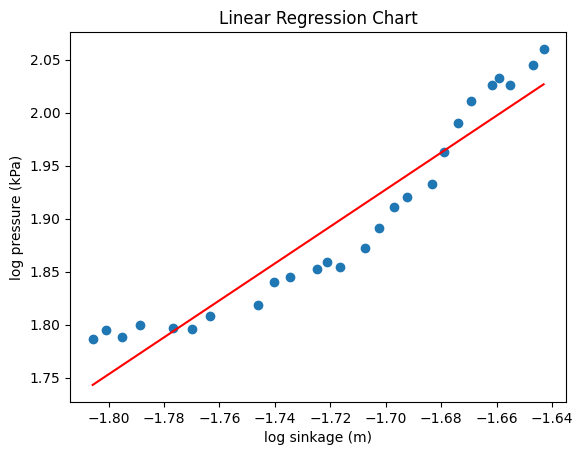

slope:  [1.74298066]
intercept:  4.8904646041583995
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA21.TXT 4.50cm

[-1.7373116556983035, -1.7335331045597584, -1.7281583934635008, -1.7173778871219374, -1.712870379280889, -1.7081873125328808, -1.6989700043360185, -1.6944336864846958, -1.6895191085373247, -1.6817279197883728, -1.6763354643918997, -1.6732546204346779, -1.6689778289581712, -1.6603498423863157, -1.6560009309428385, -1.6515004297161622, -1.6447400944726214, -1.6413039004261893, -1.6369524054789064, -1.630227711403037, -1.6256183019491175, -1.6230582428532412, -1.6196078399429725, -1.6129662987176367, -1.6094181214495646]
[1.783997034296948, 1.7759715281313526, 1.7890441704916615, 1.8125953760324987, 1.8227803030114862, 1.8356534278993384, 1.8498964403897589, 1.8637245298403142, 1.8741792802930062, 1.8858831274652164, 1.9079800539343552, 1.903192427016455, 1.907439424306425, 1.9207900664149293, 1.9389618853814767, 1.9570678077993096, 1.9666131257055401, 1.97603977

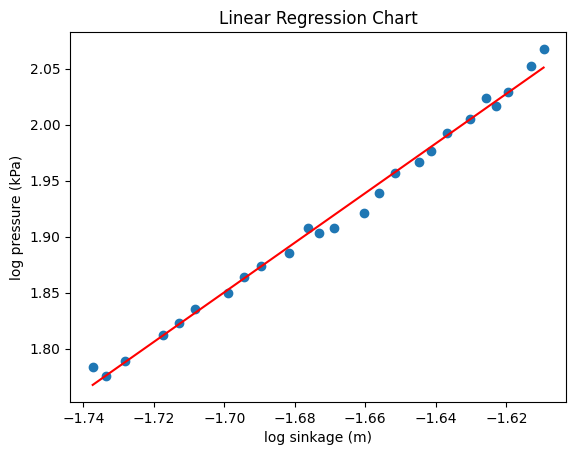

slope:  [2.21427]
intercept:  5.614623202137587
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA22.TXT 4.50cm

s[i] is significantly larger.  -1.420445039599001 - -1.70245833218184 = 0.28201329258283914
s[i] is significantly larger.  -1.3457271729022895 - -1.6294869104014074 = 0.28375973749911787
[-1.7680209731684955, -1.7629592086208092, -1.7574585717016158, -1.7486051499598956, -1.743763466794077, -1.7384992268017196, -1.730020323354676, -1.7269987279362622, -1.7226200253327453, -1.7133190306450696, -1.7077439286435239, -1.70245833218184, -1.6882461389442456, -1.6834006979061389, -1.678608721688311, -1.6701954778359305, -1.6669559701765126, -1.6625407387093436, -1.6577747706392094, -1.648977147415876, -1.6445484798734826, -1.6401645176601118, -1.6332036167132697, -1.6294869104014074]
[1.7716483238096281, 1.780116155869948, 1.7982273288329635, 1.807645977081147, 1.817987811465792, 1.8343751503557406, 1.8395844402198467, 1.8161977621813352, 1.8164896688007384, 1.8382780522

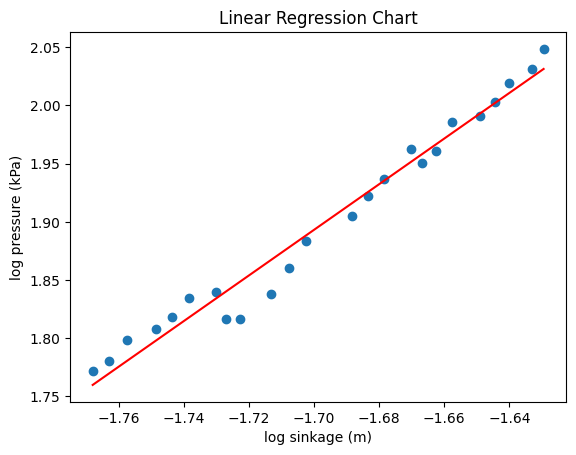

slope:  [1.95850136]
intercept:  5.2225975216121014
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA24.TXT 4.50cm

[-1.6834006979061389, -1.6675615400843944, -1.662740460249724, -1.6577747706392094, -1.65286521708998, -1.6437828657802647, -1.6392173101267198, -1.6345120151091002, -1.6302277114030372, -1.6228759576535439, -1.6127881996862692, -1.60977163753087, -1.6058986979599552, -1.6017126946425988, -1.5977386175453197, -1.5900668766687054, -1.5861974832306485, -1.5823622603477703, -1.5787252087896533, -1.5723516288130672, -1.5643148620583702, -1.561932549546506, -1.5584619612978392, -1.5551748004902521, -1.5519123333076588, -1.5460704079422711]
[1.7793902900673748, 1.7826922376692496, 1.7761087965774947, 1.7931984385875723, 1.802682557549597, 1.8055990236519603, 1.8246253142060775, 1.8362114933957379, 1.8446147827390693, 1.8591387224068001, 1.8934907835236183, 1.8944672751815603, 1.8943627560325491, 1.9111762550421991, 1.9293285173866552, 1.9536463604343872, 1.972910542

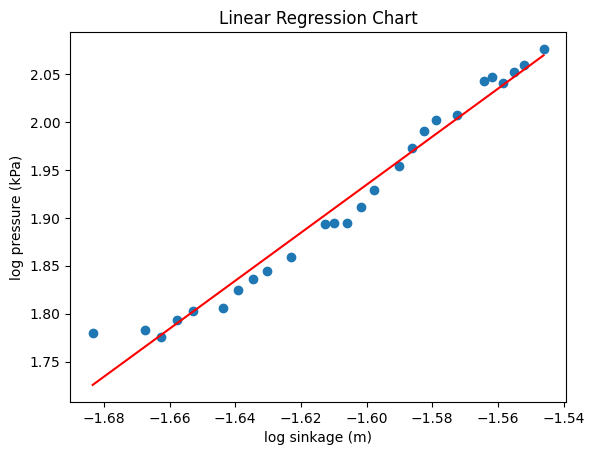

slope:  [2.50433017]
intercept:  5.941463280677681
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA25.TXT 4.50cm

[-1.8147412347034144, -1.8077113874318795, -1.796967112985289, -1.7912899800935989, -1.780677491580663, -1.775466937393914, -1.764976840504776, -1.7599502278873522, -1.7490923002991436, -1.7432822540225128, -1.7373116556983035, -1.7281583934635008, -1.723078867934226, -1.7139928779205253, -1.7095201866693266, -1.7004927012995121, -1.6918626213619612, -1.6871881737879117, -1.6823544567788413, -1.673459331483438, -1.6693833327055616, -1.6649434805609085, -1.6575773191777936, -1.6536470255493612, -1.64569943765464, -1.6386499756477335, -1.6346992513620124, -1.6305985863033756, -1.6243363860391145, -1.6206944822494178, -1.6169030700509055, -1.6108339156354674, -1.6074789100680675, -1.6022337438735499, -1.5985994592184558, -1.5955083822413139, -1.5922692719736644, -1.5887170869826157, -1.5831931281770555, -1.5802094138936371, -1.5744657795017363, -1.5720272863917908

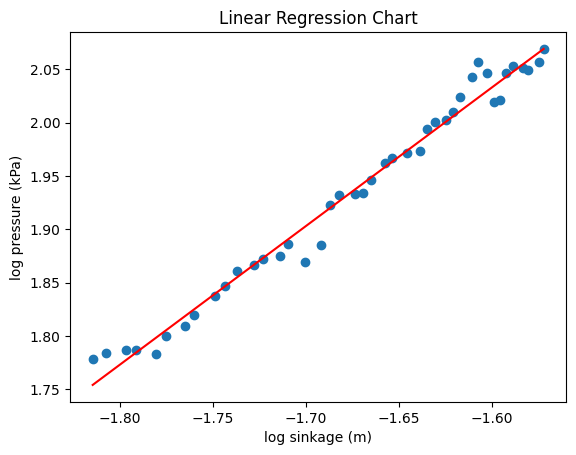

slope:  [1.29754613]
intercept:  4.1088851206483925
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA26.TXT 4.50cm

s[i] is significantly larger.  -1.436163081335455 - -1.8038238149600265 = 0.36766073362457163
[-1.8904214530956132, -1.8758219445253246, -1.8626458886292672, -1.8551145817128576, -1.8467950999157157, -1.8341623753098715, -1.8279811905754433, -1.8213107602244099, -1.809948582240794, -1.8038238149600265, -1.7812020018882624, -1.7752080435073185, -1.7685304095693184, -1.7577070950170688, -1.7522721670902766, -1.7466619946738935, -1.737786294523583, -1.732828271596986, -1.7205612117129794, -1.7157949322982058, -1.7106340484799682, -1.7057542838618818, -1.697236291527018, -1.6929320493387015, -1.68507994400758, -1.6813107300522538, -1.6771607273136786, -1.6708055849115488, -1.666149854897455, -1.6621415709589056, -1.657379957446652, -1.648977147415876, -1.6455073994105633, -1.641684359917804, -1.6348865683724227, -1.6315271615596378, -1.627640417475676, -1.62160209

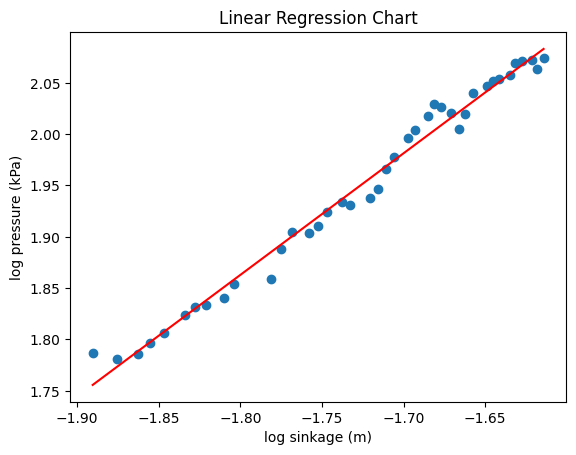

slope:  [1.18490078]
intercept:  3.9957067840412903
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA27.TXT 4.50cm

[-1.8247781996569474, -1.820448208834812, -1.8074325466634542, -1.8018930011265986, -1.7961515362537652, -1.7854210464295008, -1.7798919119599446, -1.7736579128363692, -1.7637147225519714, -1.7584535194034514, -1.7503125721946982, -1.7466619946738935, -1.7368375350377832, -1.7321245806811023, -1.7269987279362622, -1.7182850299727042, -1.7137681459714469, -1.7084091743419987, -1.7004927012995124, -1.695509472226512, -1.6878226435602213, -1.6827726508235794, -1.6781945161424607, -1.673050005834001, -1.6683702823700677, -1.6601512169623627, -1.6560009309428385, -1.648396927580871, -1.6449317936511492, -1.6407338353932512, -1.634137784597445, -1.6302277114030372, -1.6261688549261695, -1.6217838502501218, -1.617622696531886, -1.60977163753087, -1.6058986979599552, -1.599116784451637, -1.5956795327782691, -1.5920994598573648]
[1.7863715806303344, 1.7781170983384953,

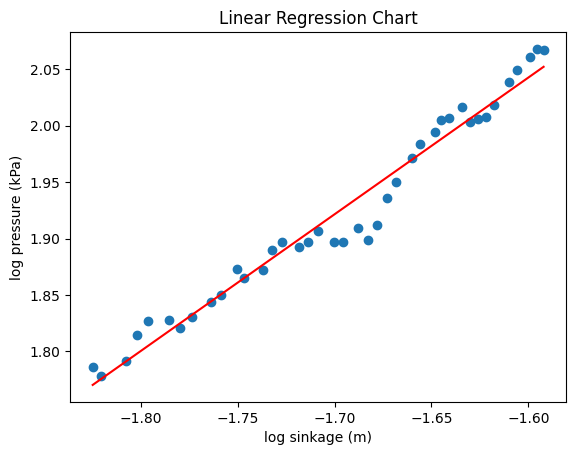

slope:  [1.21117899]
intercept:  3.980429069169461
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA28.TXT 4.50cm

s[i] is significantly larger.  -1.723078867934226 - -2.135488918941608 = 0.41241005100738226
s[i] is significantly larger.  -1.5287082889410613 - -1.896196279044043 = 0.3674879901029817
[-2.2984320149440722, -2.275724130399211, -2.2557070168773237, -2.2175273758337135, -2.1791420105603, -2.163675884293248, -2.149966742310231, -2.135488918941608, -2.095825631715836, -2.083546051450075, -2.071604147743286, -2.0604807473813813, -2.037630664329979, -2.0101054362812265, -2.0030507515046185, -1.9931062920520994, -1.9821322810364943, -1.9653715433746797, -1.9578184054842334, -1.9492336887669577, -1.931814138253838, -1.9229956732066495, -1.9143527117031434, -1.896196279044043, -1.8764750190572677, -1.868702203402377, -1.8604357338241502, -1.8477116556169433, -1.8416375079047502, -1.834755673874689, -1.8236193077567295, -1.8082696066371435, -1.8038238149600265, -1.79778

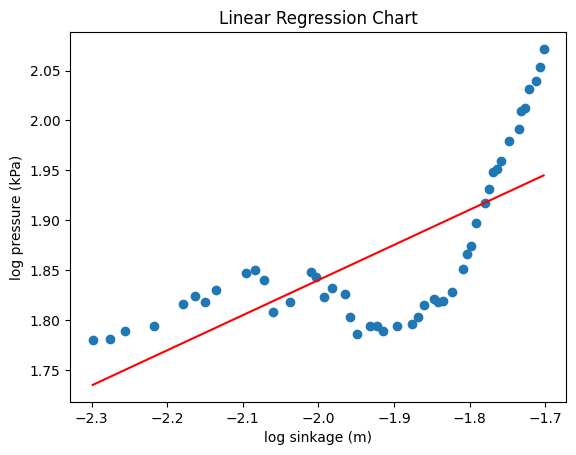

slope:  [0.35149994]
intercept:  2.543393944225456
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA29.TXT 4.50cm

s[i] is significantly larger.  -1.412401270278755 - -1.7106340484799682 = 0.2982327782012133
[-1.8520146793161947, -1.8446639625349381, -1.8389316145288255, -1.8247781996569474, -1.8198741248359456, -1.8133261325002548, -1.802168306671097, -1.796695083861517, -1.790484985457369, -1.7806774915806634, -1.7752080435073185, -1.7695510786217261, -1.7530093007584502, -1.7490923002991436, -1.7435227937583229, -1.737786294523583, -1.7325935812470958, -1.721703791908726, -1.7164726351383062, -1.7106340484799682, -1.6957249495228717, -1.6834006979061389, -1.6798537138889458, -1.6753060861382252, -1.6677635845085566, -1.6637404479858064, -1.655804284128565, -1.6524748400013103, -1.648590248074561]
[1.7797080056454597, 1.7897984237529472, 1.7933743375295894, 1.804957367073425, 1.7966593197734628, 1.8117533118192914, 1.8344151535319217, 1.8474189537850298, 1.853126840166596

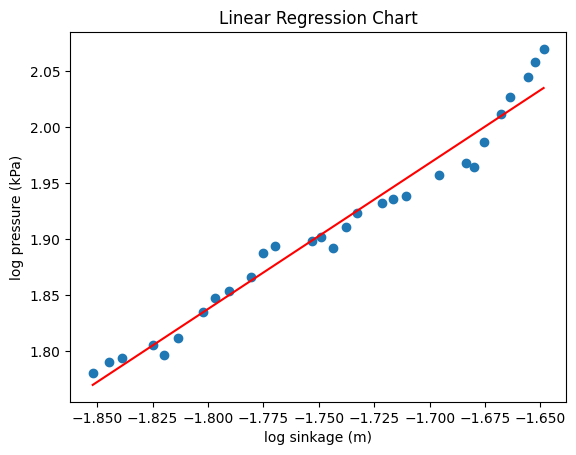

slope:  [1.30579659]
intercept:  4.187842157426925
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA30.TXT 4.50cm

s[i] is significantly larger.  -1.5975666537806879 - -1.761201437286083 = 0.16363478350539507
s[i] is significantly larger.  -1.5938005763366871 - -1.761201437286083 = 0.16740086094939577
s[i] is significantly larger.  -1.5897290357478153 - -1.761201437286083 = 0.1714724015382676
s[i] is significantly larger.  -1.5826944167554744 - -1.761201437286083 = 0.17850702053060852
s[i] is significantly larger.  -1.5793842293742348 - -1.761201437286083 = 0.18181720791184808
s[i] is significantly larger.  -1.5793842293742348 - -1.761201437286083 = 0.18181720791184808
s[i] is significantly larger.  -1.5730010412434627 - -1.761201437286083 = 0.18820039604262018
s[i] is significantly larger.  -1.5671909949668317 - -1.761201437286083 = 0.19401044231925124
s[i] is significantly larger.  -1.5344684430264501 - -1.761201437286083 = 0.22673299425963278
[-1.8551145817128576, -1.848

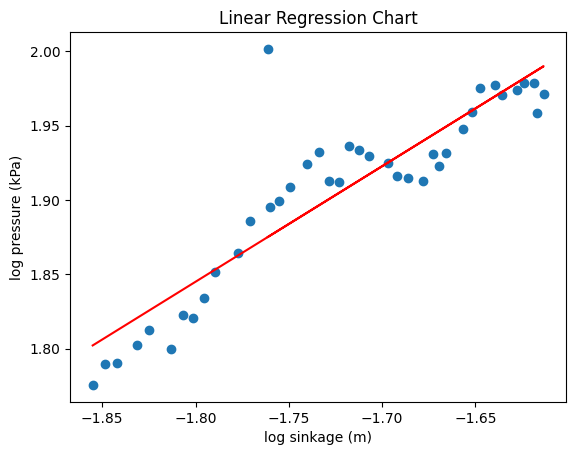

slope:  [0.77757946]
intercept:  3.244680621088552
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA31.TXT 4.50cm

s[i] is significantly larger.  -1.5380515047962382 - -1.8434508486682186 = 0.3053993438719804
s[i] is significantly larger.  -1.4624327428473247 - -1.7657358756212107 = 0.303303132773886
[-1.9284861949049106, -1.9132843360551175, -1.907630300370879, -1.8996294548824368, -1.8917733436250714, -1.8771290771355642, -1.8696662315049937, -1.8620132672764684, -1.850165303284215, -1.8434508486682186, -1.8239087409443187, -1.8187282284405382, -1.8121973612815803, -1.8057632512761705, -1.7929044595807817, -1.786747947803603, -1.7759851886271358, -1.771086594005312, -1.7657358756212107, -1.7505570385574176, -1.7466619946738935, -1.7420815496859412, -1.7321245806811023, -1.7267671659569543, -1.721246399047171, -1.711974464611637, -1.7077439286435239, -1.7031155244614529, -1.6989700043360185, -1.6903698325741012, -1.6873995607387404, -1.6831912479469777, -1.6744843366368518

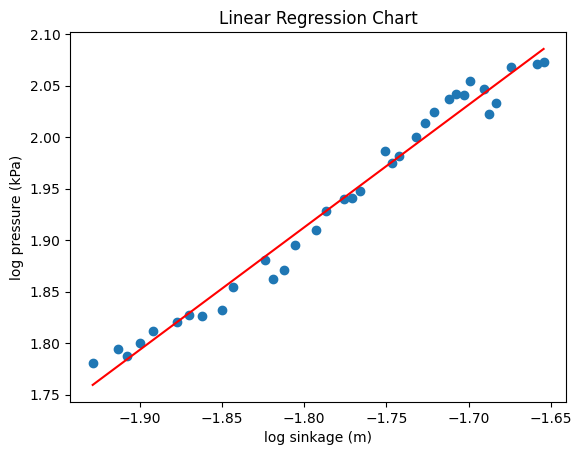

slope:  [1.19034415]
intercept:  4.0550474609570974
--- 
/content/drive/My Drive/Bevameter/Data/USMK (12 11) DATA32.TXT 4.50cm

s[i] is significantly larger.  -1.3891269996199482 - -1.6724367398127218 = 0.28330974019277355
s[i] is significantly larger.  -1.3496924768680634 - -1.6348865683724225 = 0.28519409150435915
[-1.7915586435614324, -1.780153613975639, -1.7759851886271358, -1.770318157682324, -1.7587026128900067, -1.7530093007584497, -1.7466619946738935, -1.7375489102695703, -1.7325935812470958, -1.7269987279362622, -1.712870379280889, -1.7099653886374817, -1.7055337738384069, -1.6957249495228717, -1.6907958203295923, -1.6852903070448262, -1.6769542645182984, -1.6724367398127218, -1.6599526823386068, -1.6540384581868586, -1.6516951369518391, -1.6437828657802647, -1.6394065864347511, -1.6348865683724225, -1.623423042943488, -1.6196078399429725, -1.6135010344493468, -1.6101254416090143, -1.6050232804454354, -1.6036262724634933, -1.597051170655595, -1.59328954139021, -1.5893914574316

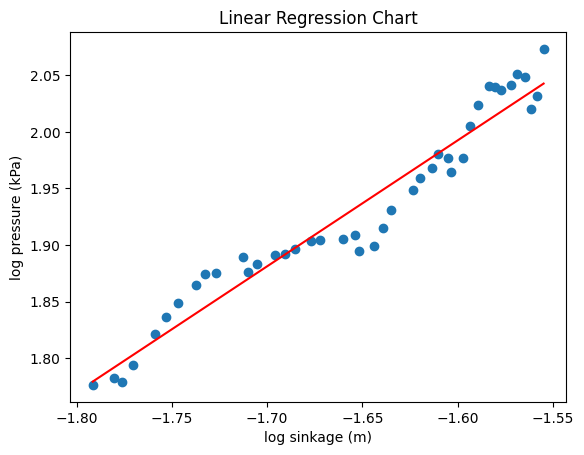

slope:  [1.11230706]
intercept:  3.772125497387371
sinkage lists: [[[-1.831797253157369, -1.8247781996569474, -1.8178707859470016, -1.8057632512761705, -1.7996968170184147, -1.7934439559009703, -1.7833064008302455, -1.775725985705742, -1.771599641296995, -1.7662426370344892, -1.7549811292622468, -1.7493360805367562, -1.7432822540225128, -1.7337683033101063, -1.7288556820509215, -1.7242280998350685, -1.7146677723561152, -1.7081873125328808, -1.7050930893948073, -1.70071066591232, -1.6907958203295923, -1.6855007720268482, -1.6802695056697754, -1.6718243385616773, -1.667359589612537, -1.6589613683224769, -1.655018586072742, -1.6468534537860204, -1.6430185990068686]], [[-2.101274818410506, -2.087246696328677, -2.073657553374345, -2.050609993355087, -2.024568191490737, -2.0123337350737254, -2.001740661576301, -1.991399828238082, -1.980883709552927, -1.9621752494116578, -1.9531148091622896, -1.9438577379409476, -1.9347938719456876, -1.9186526921958673, -1.8989406450918842, -1.890759031411796

In [ ]:
#Functions for Bekker Model Linear Regression only
#Extracts sinkage and pressure data from the text files for each plate size

sinkage=[]
pressure=[]
n=[]
k=[]
list_directories=[]

for root, dirs, files in os.walk(directory):
    files = [file for file in files if file != '.DS_Store']
    s2=[]
    p2=[]
    n1=[]
    k1=[]
    index = 0

    list_directories.append(root)
    print("---")
    print(files)
    files = plate_sizes2
    plateOrder = 0
    while plateOrder < 5:
      for file in files[plateOrder]:
          file_path = os.path.join(root, file)
          if file_path.lower().endswith('.txt'):
              s1=[]
              p1=[]
              with open(file_path, 'r') as f:

                  lines = f.readlines()
                  raw2 = lines[3].split(' ')
                  plateDiam2 = raw2[2]
                  print(f"--- ")
                  print(file_path, plateDiam2)
                  plateNumz = float(plateDiam2[:4])
                  if len(lines)>5:
                      s= []
                      p =[]
                      poffset = 0
                      soffset = 0
                      offsetComplete = False
                      list_files.append(file+'.txt')
                      for line in lines[5:]:
                          t=line.split(',')
                          if len(t)==2:
                              try:
                                  float(t[0])
                                  float(t[1])
                              except:
                                  continue
                              else:

                                  rep = float(float(t[0])/(3.14 * 1000 * (plateNumz/200)**2))
                                  res = float(t[1])/1000
                                  if(rep <= 1 and offsetComplete == False and res <= 0.1):
                                    poffset = rep
                                    soffset = res
                                  else:
                                    offsetComplete = True
                                  if (rep > 60 and res != 0 and rep < 120 and rep-poffset > 0 and res-soffset > 0):
                                    logrep = math.log(rep-poffset,10)
                                    logres = math.log(res-soffset,10)

                                    s.append(logres)
                                    p.append(logrep)
                                  '''if(float(t[0]) <= 0.1):
                                    if (rep > poffset and res > soffset):
                                      poffset = rep
                                      soffset = res
                                  #print(float(t[0]))
                                  #print(rep)
                                  else:
                                    if(rep > 60 and res != 0 and rep < 150): #and rep < 100
                                      if(res > soffset and rep > poffset):'''


                      i = 1
                      while i < len(s):
                        if (s[i]-s[i-1] > 0.1 ):
                          print("s[i] is significantly larger. ", s[i], "-", s[i-1], "=", abs(s[i]-s[i-1]))
                          s.pop(i)
                          p.pop(i)
                        elif(s[i]-s[i-1] < -0.1):
                          s.pop(i-1)
                          p.pop(i-1)
                        elif (s[i] <= s[i-1]):
                          s.pop(i)
                          p.pop(i)
                        else:
                          i += 1
                      #s.pop(i-1)
                      #p.pop(i-1)
                      s1.append(s)
                      p1.append(p)
                      #print("This is s1:", s1)
              s2.append(s1)
              p2.append(p1)
              print(s2[index][0])
              print(p2[index][0])
          t1, t2=nk_calculation(s2[index][0], p2[index][0])

          index += 1
          n1.append(t1)
          k1.append(t2)
      plateOrder += 1
      n.append(n1)
      k.append(k1)
    print(f"sinkage lists: {s2}")
    #print(p2)


print(list_files)
print('n', n)
print('n length = ', len(n[0]))
print('k', k)
print(list_directories)

**WARNING:** Change Plateorder values to 0 and 5 to properly calculate all kc and kphi values.

organized plates: [[], ['USMK (12 11) DATA0.TXT', 'USMK (12 11) DATA1.TXT', 'USMK (12 11) DATA2.TXT', 'USMK (12 11) DATA4.TXT', 'USMK (12 11) DATA5.TXT', 'USMK (12 11) DATA6.TXT', 'USMK (12 11) DATA7.TXT', 'USMK (12 11) DATA8.TXT', 'USMK (12 11) DATA10.TXT', 'USMK (12 11) DATA11.TXT', 'USMK (12 11) DATA12.TXT', 'USMK (12 11) DATA13.TXT', 'USMK (12 11) DATA14.TXT', 'USMK (12 11) DATA15.TXT', 'USMK (12 11) DATA16.TXT'], ['USMK (12 11) DATA17.TXT', 'USMK (12 11) DATA18.TXT', 'USMK (12 11) DATA19.TXT', 'USMK (12 11) DATA20.TXT', 'USMK (12 11) DATA21.TXT', 'USMK (12 11) DATA22.TXT', 'USMK (12 11) DATA24.TXT', 'USMK (12 11) DATA25.TXT', 'USMK (12 11) DATA26.TXT', 'USMK (12 11) DATA27.TXT', 'USMK (12 11) DATA28.TXT', 'USMK (12 11) DATA29.TXT', 'USMK (12 11) DATA30.TXT', 'USMK (12 11) DATA31.TXT', 'USMK (12 11) DATA32.TXT'], [], []]
['USMK (12 11) DATA0.TXT', 'USMK (12 11) DATA1.TXT', 'USMK (12 11) DATA2.TXT', 'USMK (12 11) DATA4.TXT', 'USMK (12 11) DATA5.TXT', 'USMK (12 11) DATA6.TXT', 'USMK 

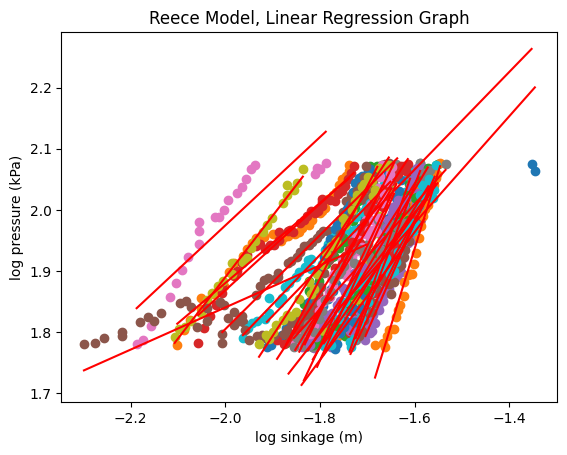

In [ ]:
#Functions for Reece Model Linearized Fit only only
#Extracts sinkage and pressure data from the text files for each plate size

print("organized plates:", plate_sizes2)
sinkage_Reece=[]
pressure_Reece=[]
n_reece=[]
n_error=[]
k_reece=[]
k_error=[]
list_directories=[]


for root, dirs, files in os.walk(directory):
    files = [file for file in files if file != '.DS_Store']
    s2=[]
    p2=[]
    n1=[]
    k1=[]
    nerr1=[]
    kerr1=[]
    index = 0

    list_directories.append(root)
    print(files)
    files = plate_sizes2
    plateOrder = 0
    while plateOrder < 5:
      for file in files[plateOrder]:
          file_path = os.path.join(root, file)

          if file_path.lower().endswith('.txt'):
              s1=[]
              p1=[]
              with open(file_path, 'r') as f:

                  lines = f.readlines()
                  raw2 = lines[3].split(' ')
                  plateDiam2 = raw2[2]
                  print(file_path, plateDiam2)
                  plateNumz = float(plateDiam2[:4])
                  if len(lines)>5:
                      s= []
                      p =[]
                      poffset = 0
                      soffset = 0
                      offsetComplete = False
                      list_files.append(file+'.txt')
                      for line in lines[5:]:
                          t=line.split(',')
                          if len(t)==2:
                              try:
                                  float(t[0])
                                  float(t[1])
                              except:
                                  continue
                              else:

                                  rep = float(float(t[0])/(3.14 * 1000 * (plateNumz/200)**2))
                                  res = float(t[1])/(1000)
                                  if(rep <= 1 and offsetComplete == False and res <= 0.1):
                                    poffset = rep

                                    soffset = res
                                  #print(float(t[0]))
                                  #print(rep)
                                  else:
                                    offsetComplete = True
                                    if (rep > 60 and res != 0 and rep < 120):
                                      plateDim = 0
                                      if (plateOrder == 0):
                                        plateDim = 3/200
                                      else:
                                        plateDim = (0.5 * plateOrder + 3.5)/200
                                      newRep = (rep-poffset)#/(plateDim)
                                      newRes = (res-soffset)#/(plateDim)
                                      if (newRep > 0 and newRes > 0):
                                        logrep = math.log(newRep,10)
                                        logres = math.log(newRes,10)
                                        s.append(logres)
                                        p.append(logrep)


                      i = 1
                      first = False
                      while i < len(s):
                        if (s[i]-s[i-1] > 1.15 ):
                          print(f"s[i] is significantly larger. {s[i]:.3f} - {s[i-1]:.3f} = {abs(s[i]-s[i-1]):.3f}")
                          s.pop(i)
                          p.pop(i)
                        elif(s[i]-s[i-1] < -0.1):
                          print(f"s[i] is significantly smaller")
                          if(i+1 < len(s)):
                            if(s[i+1]-s[i] > 0.15 ):
                              print(f"Outlier removed.")
                              s.pop(i)
                              p.pop(i)
                              i+=1
                            else:
                              s.pop(i-1)
                              p.pop(i-1)
                          else:
                            i+=1
                        elif (s[i] <= s[i-1]):
                          print(f"s[i] is just smaller")
                          #s.pop(i)
                          #p.pop(i)
                          i+=1
                        else:
                          i += 1
                      #s.pop(i-1)
                      #p.pop(i-1)
                      s1.append(s)
                      p1.append(p)
                      print(s1)
              s2.append(s1)
              p2.append(p1)
              print("sinkage", s2[index][0])
              print("pressure", p2[index][0])
          t1, t2, t3, t4=reece_calc(s2[index][0], p2[index][0])

          index += 1
          n1.append(t1)
          k1.append(t2)
          nerr1.append(t3)
          kerr1.append(t4)
      plateOrder += 1

    #print(s2)
    #print(p2)
    n_reece.append(n1)
    k_reece.append(k1)
    n_error.append(nerr1)
    k_error.append(kerr1)
#list_directories=list_directories[1:]
#n=n[1:]
#k=k[1:]

print(list_files)
print(f"n length = {len(n_reece[0])}")
print(f"n {n_reece}")
print(f"n error {n_error}")
print(f"k {k_reece}")
print(f"k error {k_error}")
print(list_directories)


In [ ]:
#Calculate mean of n, k values for each plate size

#Getting plate size list again
x = 0
while x < len(plates2):
  plates2[x] = plates2[x]
  x += 1

print(plates2)

navg = 0
kavg = 0
nordered = []
kordered = []
ntotals = []
nstds = []
nerrtotals = []
ktotals = []
kstds = []
kerrtotals = []
print(dataToPlate)

print("n[0] list", len(n[0]))

z = 0
y_off = 0
while z < len(dataToPlate):
  ntotal = 0
  ktotal = 0
  nerrtotal= 0
  kerrtotal = 0
  nordered.append([])
  kordered.append([])
  if len(dataToPlate[z]) > 0:
    print("num of plates", len(dataToPlate[z]))
    y = 0
    while y < len(dataToPlate[z]):
      ntotal += n[0][y_off]
      nerrtotal += (n_error[0][y_off])**2
      nordered[z].append(n[0][y_off])
      ktotal += k[0][y_off]
      kerrtotal += (k_error[0][y_off])**2
      kordered[z].append(k[0][y_off])
      y += 1
      y_off += 1
  ntotals.append(round(ntotal, 6))
  ktotals.append(round(ktotal, 6))
  nerrtotals.append(round(nerrtotal, 6))
  kerrtotals.append(round(kerrtotal, 6))
  z += 1

#print(plates)
print("ntotals: ", ntotals)
print("ktotals: ", ktotals)
print(f"n error totals: {nerrtotals}")
print(f"k error totals: {kerrtotals}")

print(f"n values organized by plate size: {nordered}")
print(f"keq values organized by plate size: {kordered}")

[[3.0], [4.0], [4.5], [5.0], [5.5]]
[[], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [], []]
n[0] list 30
num of plates 15
num of plates 15
ntotals:  [0, 17.076514, 21.600006, 0, 0]
ktotals:  [0, 58.904935, 65.381661, 0, 0]
n error totals: [0, 0.175555, 0.278797, 0, 0]
k error totals: [0, 0.551485, 0.805243, 0, 0]
n values organized by plate size: [[], [1.5731113406278394, 0.6538406539197845, 1.5038020138212302, 0.7136767459712965, 1.7610510126986993, 0.7695962184957482, 1.1929056116540184, 1.992353300273935, 0.9927352584968135, 0.8125829191098787, 1.5251244093666623, 1.2393877997043237, 0.9904013804532695, 1.3619749205166287, -0.006029584743984428], [1.5651063440268282, 1.547182495977747, 1.6364817501844797, 1.7429806598418869, 2.214270001573741, 1.9585013645135219, 2.504330168875151, 1.2975461316985757, 1.1849007807382845, 1.2111789917063862, 0.35149994216065283, 1.3057965859374319, 0.777579461496052, 1.19034414515

In [ ]:
#Calculates mean of n, k values for each plate size

mean_n=[]
mean_k=[]
'''for i in range(len(n)):
    arr_n=np.array(n[i])
    arr_k=np.array(k[i])
    mean_n.append(arr_n.mean())
    mean_k.append(arr_k.mean())

print(list_directories)
print('n', mean_n)
print('k', mean_k)'''
# Getting n average
nstds = []
i = 0
while i < len(dataToPlate):
  if len(dataToPlate[i]) == 0:
    mean_n.append(0)
    nstds.append(0)
  else:
    print(ntotals[i])
    avg = ntotals[i]/len(dataToPlate[i])
    mean_n.append(round(avg,5))
    nord = np.array(nordered)
    nstds.append(round(np.std(nord[i]), 4))
  i += 1

# Getting k average
kstds = []
i = 0
while i < len(dataToPlate):
  if len(dataToPlate[i]) == 0:
    mean_k.append(0)
    kstds.append(0)
  else:
    #print(ktotals[i])
    avg = ktotals[i]/len(dataToPlate[i])
    mean_k.append(round(avg,5))
    kstds.append(round(np.std(kordered[i]), 4))
  i += 1

#n and k error averages
mean_n_err=[]
mean_k_err=[]
n_CI = []
k_CI = []
i = 0
while i < len(dataToPlate):
  if len(dataToPlate[i]) == 0:
    mean_n_err.append(0)
    mean_k_err.append(0)
    n_CI.append(0)
    k_CI.append(0)
  else:
    nerr_avg = math.sqrt(nerrtotals[i])/15
    kerr_avg = math.sqrt(kerrtotals[i])/15
    mean_n_err.append(round(nerr_avg, 4))
    mean_k_err.append(round(kerr_avg,4))

    n_CI.append(round(1.96 * nstds[i]/math.sqrt(15), 4))
    k_CI.append(round(1.96 * kstds[i]/math.sqrt(15), 4))

  i += 1
print('n mean:', mean_n)
print('log k mean:', mean_k)
print(f"n mean errors: {mean_n_err}")
print(f"log k mean errors: {mean_k_err}")

print(f"n standard deviations: {nstds}")
print(f"keq standard deviations: {kstds}")

print(f"n value confidence interval: {n_CI}")
print(f"k value confidence interval: {k_CI}")

17.076514
21.600006
n mean: [0, 1.13843, 1.44, 0, 0]
log k mean: [0, 3.927, 4.35878, 0, 0]
n mean errors: [0, 0.0279, 0.0352, 0, 0]
log k mean errors: [0, 0.0495, 0.0598, 0, 0]
n standard deviations: [0, 0.4941, 0.5233, 0, 0]
keq standard deviations: [0, 0.8392, 0.8433, 0, 0]
n value confidence interval: [0, 0.25, 0.2648, 0, 0]
k value confidence interval: [0, 0.4247, 0.4268, 0, 0]


<ipython-input-47-e985e1b2cf9b>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  nord = np.array(nordered)


In [ ]:
#gets b from folder names
print(plates2)
'''def b(list_directories):
    raw_b=[]
    for i in list_directories:
        t=i.split('/')[1]
        t=float(t[:-8])
        t=t/100
        raw_b.append(t)
    return raw_b
raw_b=b(list_directories)'''
raw_b = []
x = 0
while x < len(plates2):
  raw_b.append(plates2[x][0])
  x += 1
print(raw_b)

[[3.0], [4.0], [4.5], [5.0], [5.5]]
[3.0, 4.0, 4.5, 5.0, 5.5]


In [ ]:
#calculates kc and kphi


# Remove plate sizes without any values
numPlates = len(plates2)
copy_mean_n = mean_n.copy()
print("Mean Keq:", mean_k)
i = 0
offset = 0
while i < numPlates:
  if(mean_n[i] == 0):
    raw_b.pop(i - offset)
    mean_k.pop(i - offset)
    mean_n_err.pop(i - offset)
    mean_k_err.pop(i - offset)
    copy_mean_n.pop(i - offset)
    offset += 1
  i += 1

print("Mean n: ", copy_mean_n)
print("Plate diameters: ", raw_b)

def kc_kphi_calculation(mean_k, raw_b, copy_mean_n, list_directories):
    kc=[]
    kphi=[]
    n_end = []
    combinations=[]
    i = 0
    j = 0

    for l in range(len(mean_k)):
        for j in range(l + 1, len(mean_k)):
            b1= raw_b[l]
            b1 = b1/200
            b2= raw_b[j]
            b2 = b2/200
            k_1= 10**mean_k[l]
            k_2= 10**mean_k[j]
            n_1 = copy_mean_n[l]
            n_2 = copy_mean_n[j]
            n_tot = n_1 + n_2
            n_end.append(round(n_tot / 2, 6))
            combo=list_directories[l], list_directories[j]
            combinations.append(combo)

            kc_result = (b1*b2*(k_1 - k_2))/(b2-b1)
            kc.append(kc_result)
            kphi_result = ((k_1*b1)-(k_2*b2))/(b1-b2)
            kphi.append(kphi_result)

    #print(n_end)
    return kc, kphi, n_end, combinations



Mean Keq: [0, 3.927, 4.35878, 0, 0]
Mean n:  [1.13843, 1.44]
Plate diameters:  [4.0, 4.5]


In [ ]:
kc_list,kphi_list,bend,combinations_list=kc_kphi_calculation(mean_k, raw_b, copy_mean_n, raw_b)

In [ ]:
kc_list, kphi_list, bend, combinations_list

([-2590.4923894083827], [137977.40792202204], [1.289215], [(4.0, 4.5)])

In [ ]:
#averages kc and kphi values together to for eventual queue fifo algorithmn

kc=np.array(kc_list).mean()
kphi=np.array(kphi_list).mean()
print('kc final results: ', kc)
print('kphi final results: ', kphi)
print(n)
navg = np.array(n).mean()
print("n average:", navg)

kc final results:  -2590.4923894083827
kphi final results:  137977.40792202204
[[1.5731113406278394, 0.6538406539197845, 1.5038020138212302, 0.7136767459712965, 1.7610510126986993, 0.7695962184957482, 1.1929056116540184, 1.992353300273935, 0.9927352584968135, 0.8125829191098787, 1.5251244093666623, 1.2393877997043237, 0.9904013804532695, 1.3619749205166287, -0.006029584743984428, 1.5651063440268282, 1.547182495977747, 1.6364817501844797, 1.7429806598418869, 2.214270001573741, 1.9585013645135219, 2.504330168875151, 1.2975461316985757, 1.1849007807382845, 1.2111789917063862, 0.35149994216065283, 1.3057965859374319, 0.777579461496052, 1.1903441451516676, 1.1123070563488857], [1.5731113406278394, 0.6538406539197845, 1.5038020138212302, 0.7136767459712965, 1.7610510126986993, 0.7695962184957482, 1.1929056116540184, 1.992353300273935, 0.9927352584968135, 0.8125829191098787, 1.5251244093666623, 1.2393877997043237, 0.9904013804532695, 1.3619749205166287, -0.006029584743984428, 1.56510634402682

**Bekker Model calculations end here!**  
All further code is for calculating the linearized Reece Model parameters.


In [ ]:
print("Reece n values list:", n_reece[0])
print("Reece K_eq values list:", k_reece[0])
print(dataToPlate)
Rntotals = []
Rktotals = []

navg = 0
kavg = 0

z = 0
y_off = 0
while z < len(dataToPlate):
  ntotal = 0
  ktotal = 0

  if len(dataToPlate[z]) > 0:
    print("num of plates", len(dataToPlate[z]))
    y = 0
    while y < len(dataToPlate[z]):
      ntotal += n_reece[0][y_off]
      ktotal += k_reece[0][y_off]
      y += 1
      y_off += 1
  Rntotals.append(ntotal)
  Rktotals.append(ktotal)
  z += 1

#print(plates)
print("ntotals: ", Rntotals)
print("ktotals: ", Rktotals)

#Get averages of Reece's n and k_eq values per plate
Rnavg = []
Rkavg = []
i = 0
while i < len(Rntotals):
  if(len(dataToPlate[i]) > 0):
    navg = Rntotals[i]/len(dataToPlate[i])
    kavg = Rktotals[i]/len(dataToPlate[i])
    #print(navg)
    #print(kavg)
    Rnavg.append(navg)
    Rkavg.append(kavg)
  i += 1

print("n averages:", Rnavg)
print("k averages:", Rkavg)

Reece n values list: [1.575430119752584, 0.6555743477357924, 1.5098499134983963, 0.7082191098139093, 1.7831842658764399, 0.7698360213661243, 0.72307040416138, 2.0124507086285774, 1.0049147321044158, 0.8064806069387651, 0.7988385011576952, 1.2463312145404806, 0.9900887845085835, 1.3619749205166292, 1.0470827299310332, 1.5891677948538718, 1.5471824959777476, 1.6440985382095679, 1.7429806598418878, 2.214270001573741, 0.8742230527359226, 2.5200496138412336, 1.294112148458475, 1.183824246911601, 1.2111789917063864, 0.34487225177341513, 1.299018183133619, 0.8585581171998021, 1.1903441451516679, 1.1019108522924084]
Reece K_eq values list: [4.665798127114292, 3.1911229924445963, 4.604963324642691, 3.284519132110917, 4.831553013439306, 3.3441933874010297, 3.420412801589924, 5.259801508906957, 3.89932304172061, 3.377679066736415, 3.3439354800309697, 3.9965247855996697, 3.579572384882103, 4.161433533468667, 3.638587680212451, 4.521616142643644, 4.619969230544598, 4.735801333153862, 4.890464604158

In [ ]:
#Calculate kc and kphi values from Reece linearized data

def Reece_param_calc(Rmean_k, raw_b, Rmean_n, list_directories):
    kc=[]
    kphi=[]
    dkc = []
    dkphi = []
    n_end = []
    dn = []
    combinations=[]
    i = 0
    j = 0

    for l in range(len(mean_k)):
        for j in range(l + 1, len(mean_k)):
            b1= raw_b[l]
            b1 = b1/200
            b2= raw_b[j]
            b2 = b2/200
            n_1 = Rmean_n[l]
            n_2 = Rmean_n[j]
            Rk_1= 10**Rmean_k[l] * b1**n_1
            Rk_2= 10**Rmean_k[j] * b2**n_2
            print("k_eq values exponentiated, ", Rk_1, Rk_2)
            n_tot = n_1 + n_2
            n_end.append(round(n_tot / 2, 6))
            #print(n_end)
            combo=list_directories[l], list_directories[j]
            combinations.append(combo)
            kc_result = ((Rk_1 * b2) - (Rk_2 * b1))/(b2 - b1)
            kc.append(kc_result)
            kphi_result = (Rk_1 - Rk_2)/(b1-b2)
            kphi.append(kphi_result)

            #error calcs begin here

            k_SE1 = kstds[l]/math.sqrt(15)
            n_SE1 = nstds[l]/math.sqrt(15)
            k_SE2 = kstds[j]/math.sqrt(15)
            n_SE2 = nstds[j]/math.sqrt(15)
            print(f"n (slope) standard errors: {round(n_SE1,5)}, {round(n_SE2,5)}")
            print(f"k (intercept) standard errors: {round(k_SE1,5)}, {round(k_SE2,5)}")

            #x represents our first plate, y represents our second
            x_1 = 10**Rkavg[0]
            x_2 = 10**Rkavg[1]
            y_1 = b1**Rnavg[0]
            y_2 = b1**Rnavg[1]

            dx_1 = x_1 * math.log(10, 2.7183) * k_SE1
            dx_2 = x_2 * math.log(10, 2.7183) * k_SE2
            dy_1 = y_1 * math.log(b1, 2.7183) * n_SE1
            dy_2 = y_2 * math.log(b2, 2.7183) * n_SE2

            a_1 = x_1 * y_1
            a_2 = x_2 * y_2
            da_1 = a_1 * math.sqrt((dx_1/x_1)**2 + (dy_1/y_1)**2)
            da_2 = a_2 * math.sqrt((dx_2/x_2)**2 + (dy_2/y_2)**2)
            print(f"da values: {da_1:.3f} and {da_2:.3f}")
            dkc_s = math.sqrt((b2*da_1)**2 + (b1*da_2)**2) / (b2 - b1)
            dkphi_s = math.sqrt((da_1)**2 + (da_2)**2) / (b1 - b2)
            dn_s = math.sqrt(nstds[l]**2 + nstds[j]**2)/2

            #Includes 95% CI factor
            dn.append(1.96 * dn_s)
            dkc.append(1.96 * dkc_s)
            dkphi.append(1.96 * dkphi_s)
    print(f" ")
    print(f"No confidence interval results:")
    print(f"------")
    print(f"K_c error: {round(dkc[0]/1.96,4)}")
    print(f"K_phi error: {round(dkphi[0]/1.96,4)}")
    print(f"n error: {round(dn[0]/1.96,4)}")

    print(f" ")
    print(f" ")
    print(f"With confidence interval results:")
    print(f"-----")
    print(f"K_c error: {round(dkc[0],4)}")
    print(f"K_phi error: {round(dkphi[0],4)}")
    print(f"n error: {round(dn[0],4)}")
    print(f" ")

    #print(n_end)
    return kc, kphi, n_end, combinations

Rkc_list, Rkphi_list, Rbend, Rcombinations_list=Reece_param_calc(Rkavg, raw_b, Rnavg, raw_b)
Rkc_list, Rkphi_list, Rbend, Rcombinations_list

k_eq values exponentiated,  95.91456564192207 95.99865236255695
n (slope) standard errors: 0.0, 0.12758
k (intercept) standard errors: 0.0, 0.21668
da values: 0.000 and 56.759
 
No confidence interval results:
------
K_c error: 454.0755
K_phi error: -22703.7755
n error: 0.247
 
 
With confidence interval results:
-----
K_c error: 889.988
K_phi error: -44499.3999
n error: 0.4842
 


([95.24187187684299], [33.63468825395445], [1.253637], [(4.0, 4.5)])

**Alternative Reece Model Calculations**

Uses first pressure-sinkage linear relationship

In [ ]:
print(mean_k, copy_mean_n, raw_b)

i = 0
k_eq = []
while i < len(mean_k):
  Pres = 10**mean_k[i]
  b_n = (raw_b[i]/200)**copy_mean_n[i]
  kVal = Pres * b_n
  k_eq.append(kVal)
  i += 1
print(k_eq)

i = 0
j = 0
combinations = []
n_end = []
kc = []
kphi = []
for l in range(len(mean_k)):
    for j in range(l + 1, len(mean_k)):
        b1= raw_b[l]
        b1 = b1/200
        b2= raw_b[j]
        b2 = b2/200
        Rk_1= k_eq[l]
        Rk_2= k_eq[j]
        #print("k_eq values exponentiated, ", Rk_1, Rk_2)
        n_1 = copy_mean_n[l]
        n_2 = copy_mean_n[j]
        n_tot = n_1 + n_2
        n_end.append(round(n_tot / 2, 6))

        kc_result = ((Rk_1 * b2) - (Rk_2 * b1))/(b2 - b1)
        kc.append(kc_result)
        kphi_result = (Rk_1 - Rk_2)/(b1-b2)
        kphi.append(kphi_result)

print("K_c:", kc)
print("K_phi:", kphi)
print("n_avg:", n_end)
print(Rcombinations_list)


[3.927, 4.35878] [1.13843, 1.44] [4.0, 4.5]
[98.36522234349633, 96.81058090407485]
K_c: [110.8023538588681]
K_phi: [-621.8565757685898]
n_avg: [1.289215]
[(4.0, 4.5)]
